In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(8103, 28)
(8103, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FR is supporting
idxs = np.where(X_relative_footsteps_acc[:, 22] == 0)[0]
X_relative_footsteps_acc_FR_support = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_FR_support = Y_relative_footsteps_acc[idxs]

## Predict FR foot -> x

In [8]:
X_relative_footsteps_acc_FR_support[0, :]

array([ 0.        ,  0.        , -0.1       ,  0.03223521, -0.16707049,
        0.01633024, -0.05086472,  0.01613139, -0.08244775,  0.22421836,
        0.2146329 , -0.40479645,  0.23125328, -0.18591964, -0.40580276,
       -0.2571617 ,  0.15356685, -0.40042184, -0.2596469 , -0.13334387,
       -0.40039383,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_acc_FR_support[0, :]

array([ 0.22407743,  0.18885393,  0.23964177, -0.19926585, -0.26746292,
        0.12131841, -0.25399354, -0.15574807])

### Linear Regression

In [46]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_support[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_support_x = LinearRegression()

# Fit the model
model_fr_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.888545951599454
RMSE:  0.008328896116187303
The lowest error is:  7.750145630314176e-06
The highest error is:  0.046723058381998334
The avg. error is:  0.0058553327936211675


In [47]:
model_fr_relative_support_x.coef_

array([[ 5.08267902e-04, -8.11219666e-02, -2.22271444e-02,
        -5.98263816e-02,  5.50363497e-03,  2.22672730e-02,
        -3.58221987e-01, -3.25189283e-02,  8.54130746e-01,
         4.65646779e-01, -1.00328390e+00,  3.40848218e-01,
        -1.51644072e-01,  1.40990633e-01]])

In [48]:
model_fr_relative_support_x.intercept_

array([-0.11990625])

Text(0, 0.5, 'Predictions')

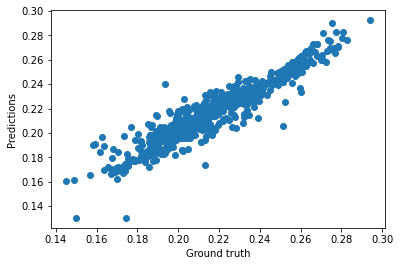

In [49]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_fr_relative_support_x

In [22]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [23]:
# Save model
#joblib.dump(model_fr_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_support_x.sav")

### Predict FR foot -> y

In [34]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_support[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_support_y = LinearRegression()

# Fit the model
model_fr_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9426427402803692
RMSE:  0.008834902758475914
The lowest error is:  7.926947105107995e-06
The highest error is:  0.044513948107029744
The avg. error is:  0.005597238803788001


In [35]:
model_fr_relative_support_y.coef_

array([[-0.0198517 , -0.1506612 , -0.10744551,  0.01570289, -0.04883138,
        -0.03655234, -0.07477366, -0.51466563,  0.06841371,  0.99727533,
        -0.08124677,  0.25820718, -0.03537239,  0.07453805]])

In [36]:
model_fr_relative_support_y.intercept_

array([0.03006918])

Text(0, 0.5, 'Predictions')

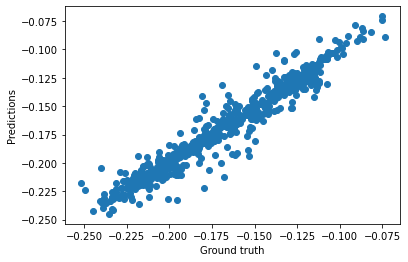

In [37]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [90]:
#%store model_fr_relative_support_y

In [19]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [91]:
# Save model
#joblib.dump(model_fr_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_support_y.sav")